## Pumpcard data transformation

* Setup

Make sure this notebook works well in both python2 and python3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. 

In [1]:
# To support both python2 and 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# To make this notebook's output stable across runs, set a seed
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "pj_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### Load Data and Transform


In [2]:
# import libraries
import os
from ast import literal_eval
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

def load_csv():
    return pd.read_csv('pj.csv')

def transform_data():
    df1 = load_csv()
    dataset = {}
    cards = {'card{0}'.format(i):literal_eval(df1['card_data'].values[i]) for i in range(len(df1.index))}
    for card in cards: 
        dataset[card] = {'x{0}'.format(i):cards[card][i][0] for i in range(len(cards[card]))}
        dataset[card].update({'y{0}'.format(i):cards[card][i][1] for i in range(len(cards[card]))})
    df2 = pd.DataFrame.from_dict(dataset, orient = 'index').reset_index()
    df = pd.concat([df1,df2], axis=1).drop(['card_data'], axis=1)
    return df

In [72]:
pjs = transform_data()

In [78]:
# drop columns x100, y100 and up
pjs.drop(list(pjs.filter(regex='^(x1[0-9]{2}|200)')), axis=1, inplace = True)
pjs.drop(list(pjs.filter(regex='^(y1[0-9]{2}|200)')), axis=1, inplace = True)
pjs.dropna(axis=0, inplace=True)
# pjs.isna()

#### make a copy of df and  to regex to drop all x, y columns

In [70]:
pj = pjs.copy()
xpj = pj[pj.columns.drop(list(pj.filter(regex='^x')))]
pj_info = xpj[xpj.columns.drop(list(xpj.filter(regex='^y')))]

Saving figure attribute_histogram_plots


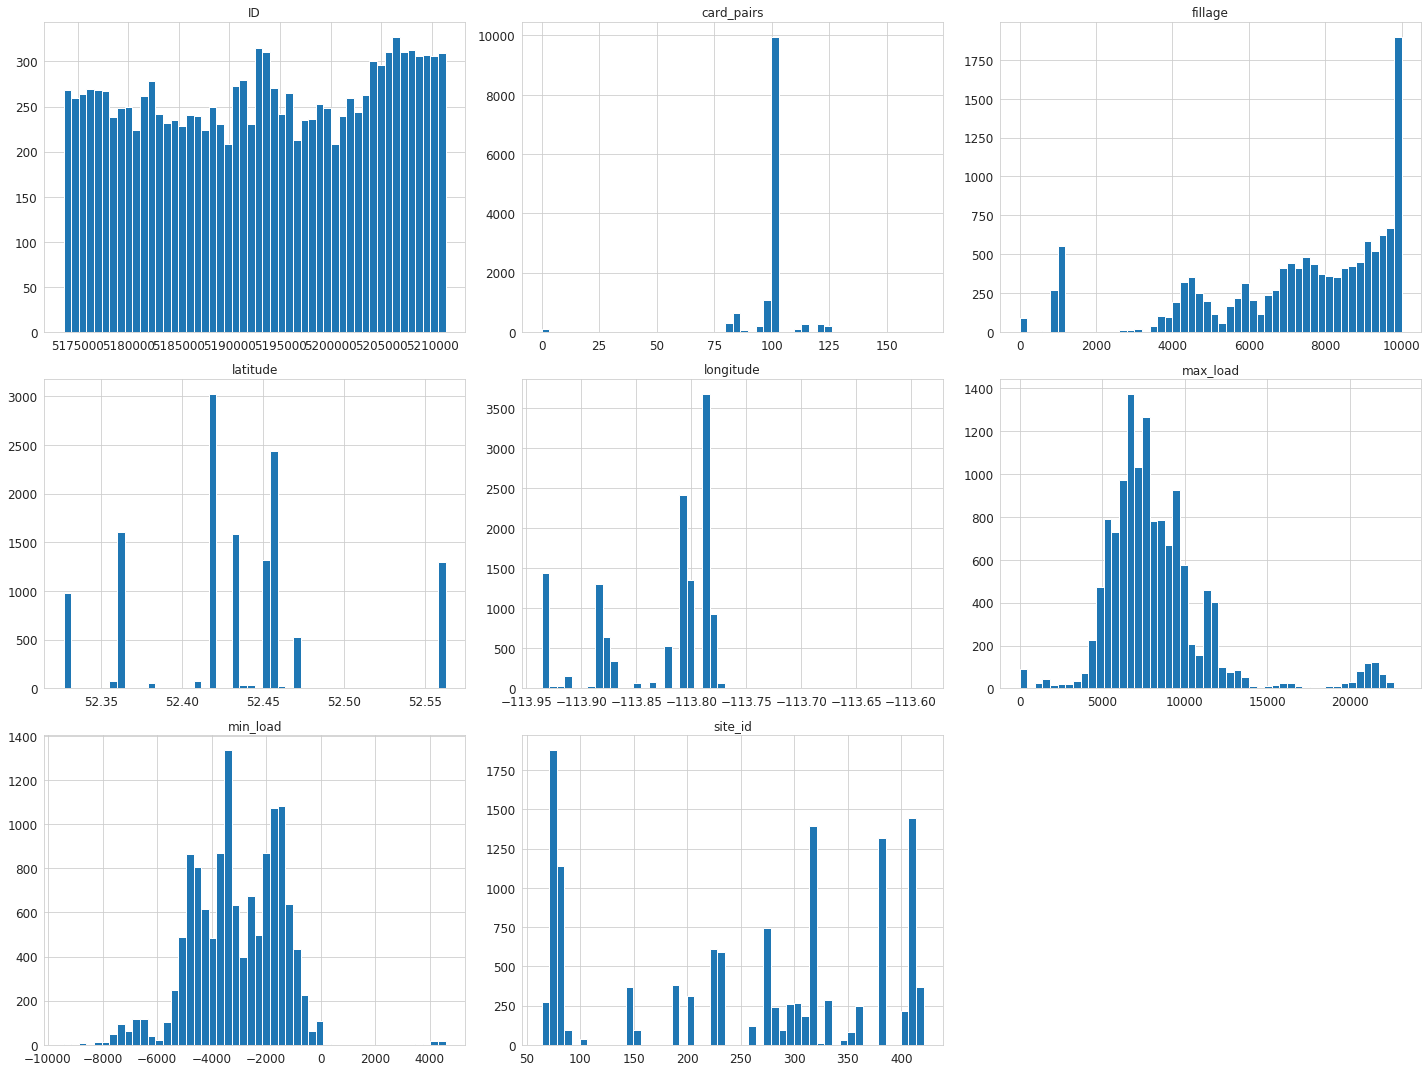

In [81]:
%matplotlib inline
pj_info.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

### Exploratory Analysis

In [68]:
sns.set_style('whitegrid')
sns.lmplot('max_load','fillage',data=pj,height=6,aspect=1,fit_reg=True)

<Figure size 432x432 with 1 Axes>